## Straitum simulation

In [1]:
import neurosimulator as ns

In [29]:
from populations import Striatum
ns.initNetwork(Striatum)

<IPython.core.display.Javascript object>


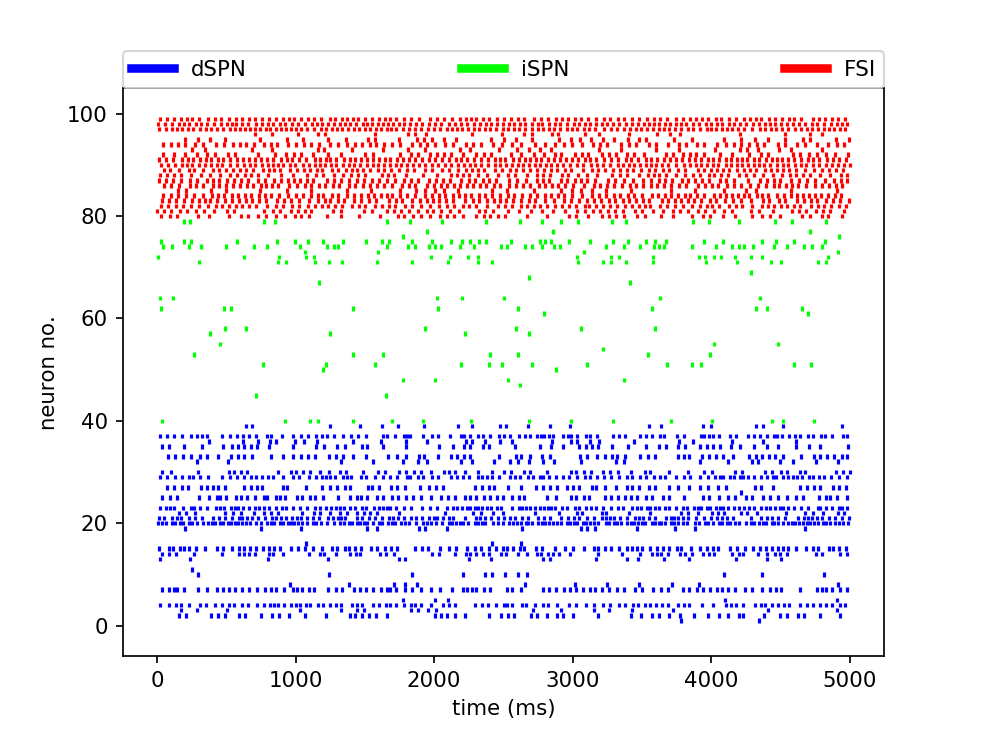

<IPython.core.display.Javascript object>


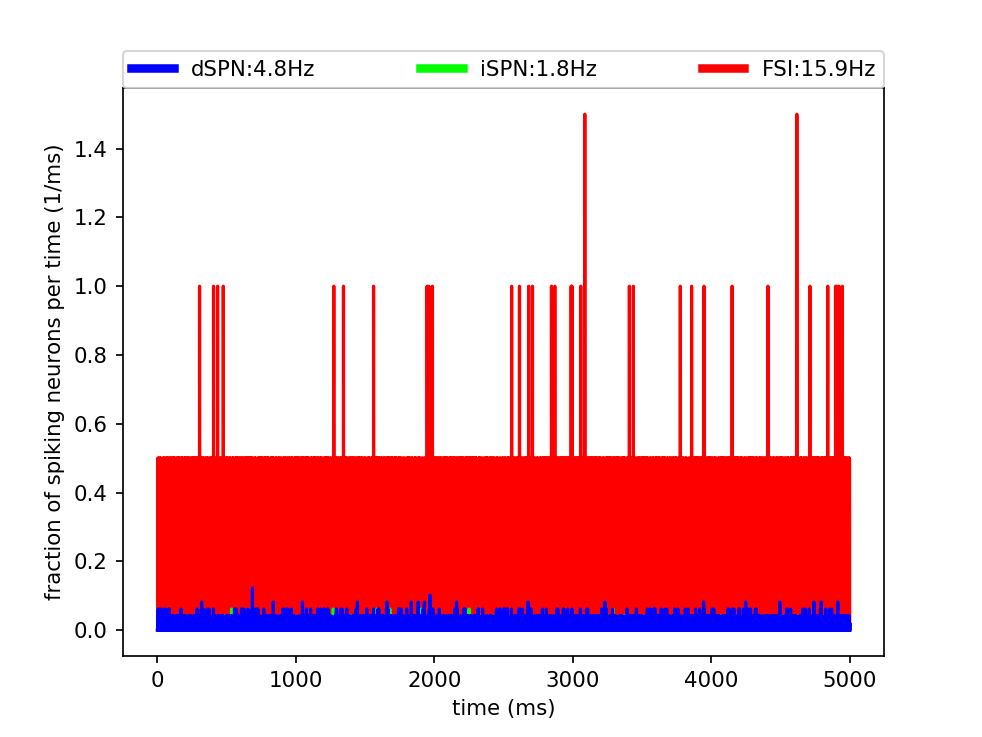

In [31]:
%matplotlib notebook
ns.runplot(5000, ns.monitorind([40,40,20]));

In [10]:
from matplotlib import pyplot as plt
plt.savefig('plot2.png', dpi=1000)

In [21]:
from populations import Striatum
Striatum.CW[2,2] = -9.

<IPython.core.display.Javascript object>


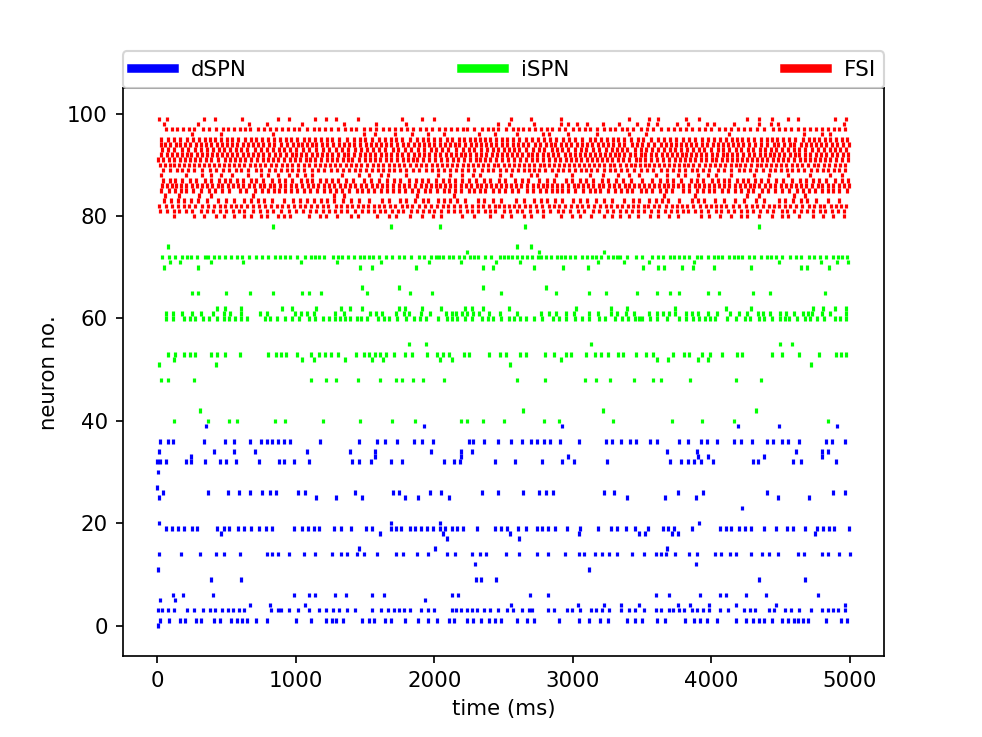

<IPython.core.display.Javascript object>


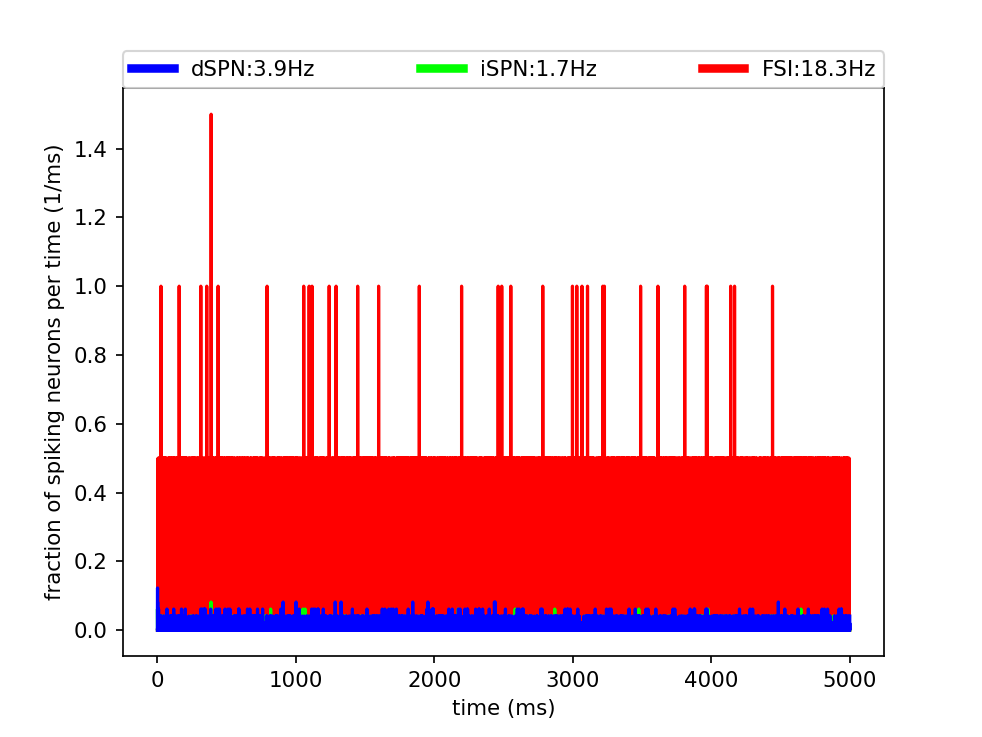

In [23]:
ns.initNetwork(Striatum)
ns.runplot(5000, ns.monitorind([40,40,20]));

In [26]:
plt.savefig('plot3.png', dpi=1000)

## statistical analysis

In [12]:
def plotPDF(data):
    y,binEdges = np.histogram(data,bins=20)
    validy = y>1
    y = y/len(data)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    menStd     = np.sqrt(y*(1-y))
    width      = 1
    plt.plot(bincenters[validy], y[validy], '-o')
    

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: Matplotlib

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: Matplotlib

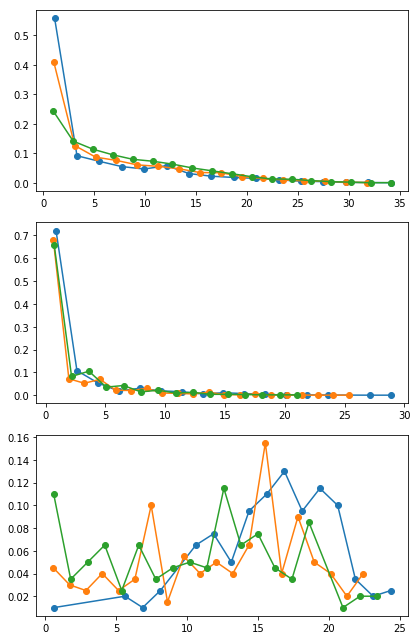

In [17]:
import neurosimulator as ns
import numpy as np
from matplotlib import pyplot as plt
from populations import Striatum

fig, axs = plt.subplots(3,1,figsize=(6,9))
for i in range(len(axs)):
    axs[i].set_yscale('log')

CWmods = np.array([-6, -9, -12])
for mod in range(len(CWmods)):
    Striatum.CW[2,2] = CWmods[mod]
    Striatum.MeanIx[2] = 21.
    dsp = np.array([])
    isp = np.array([])
    fsi = np.array([])
    for i in range(10):
        ns.initNetwork(Striatum)
        ns.rundynamics(200);
        ns.rundynamics(1000);
        dsp = np.append(dsp, ns.Neuron.SpikeCount[ns.Neuron.Tag==0])
        isp = np.append(isp, ns.Neuron.SpikeCount[ns.Neuron.Tag==1])
        fsi = np.append(fsi, ns.Neuron.SpikeCount[ns.Neuron.Tag==2])


    
    plt.subplot(3,1,1)
    plotPDF(dsp)
    plt.subplot(3,1,2)
    plotPDF(isp)
    plt.subplot(3,1,3)
    plotPDF(fsi)

plt.tight_layout()
plt.show()


## Increasing GABA

In [48]:
import neurosimulator as ns
import numpy as np
from matplotlib import pyplot as plt
from populations import Striatum


CWmods = range(-6, -60, -6)
CWmods = range(-6, -600, -60)
meanRate = np.zeros((3,len(CWmods)))
stdRate = np.zeros((3,len(CWmods)))

for mod in range(len(CWmods)):
    Striatum.CW[2,2] = CWmods[mod]
    Striatum.MeanIx[2] = 22. 
    dsp = np.array([])
    isp = np.array([])
    fsi = np.array([])
    for i in range(3):
        ns.initNetwork(Striatum)
        ns.rundynamics(200);
        ns.rundynamics(1000);
        dsp = np.append(dsp, ns.Neuron.SpikeCount[ns.Neuron.Tag==0])
        isp = np.append(isp, ns.Neuron.SpikeCount[ns.Neuron.Tag==1])
        fsi = np.append(fsi, ns.Neuron.SpikeCount[ns.Neuron.Tag==2])
  
    meanRate[0,mod] = np.mean(dsp)
    meanRate[1,mod] = np.mean(isp)
    meanRate[2,mod] = np.mean(fsi)
    stdRate[0,mod] = np.std(dsp)
    stdRate[1,mod] = np.std(isp)
    stdRate[2,mod] = np.std(fsi)



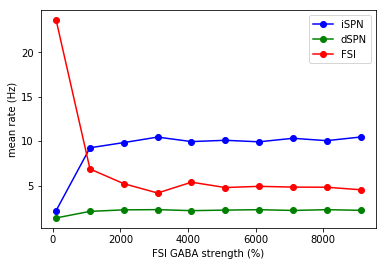

In [51]:
fig, axs = plt.subplots(1,1)
modsPercent = np.array(CWmods)/CWmods[0]*100
plt.plot(modsPercent, meanRate[0,:], 'b-o')
plt.plot(modsPercent, meanRate[1,:], 'g-o')
plt.plot(modsPercent, meanRate[2,:], 'r-o')
plt.ylabel('mean rate (Hz)')
plt.xlabel('FSI GABA strength (%)')
plt.legend(('iSPN', 'dSPN', 'FSI'))

#fig.savefig('meanRate_vs_GABA.png', dpi=1000)

## Decreasing FSI input

In [42]:
import neurosimulator as ns
import numpy as np
from matplotlib import pyplot as plt
from populations import Striatum


Ixmods = np.array(range(2200, 2050, -25))/100
meanRate = np.zeros((3,len(Ixmods)))
stdRate = np.zeros((3,len(Ixmods)))

for mod in range(len(Ixmods)):
    Striatum.MeanIx[2] = Ixmods[mod]
    Striatum.CW[2,2] = -6.
    dsp = np.array([])
    isp = np.array([])
    fsi = np.array([])
    for i in range(3):
        ns.initNetwork(Striatum)
        ns.rundynamics(200);
        ns.rundynamics(1000);
        dsp = np.append(dsp, ns.Neuron.SpikeCount[ns.Neuron.Tag==0])
        isp = np.append(isp, ns.Neuron.SpikeCount[ns.Neuron.Tag==1])
        fsi = np.append(fsi, ns.Neuron.SpikeCount[ns.Neuron.Tag==2])
  
    meanRate[0,mod] = np.mean(dsp)
    meanRate[1,mod] = np.mean(isp)
    meanRate[2,mod] = np.mean(fsi)
    stdRate[0,mod] = np.std(dsp)
    stdRate[1,mod] = np.std(isp)
    stdRate[2,mod] = np.std(fsi)



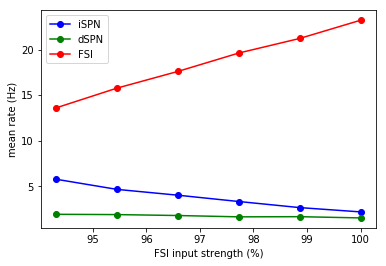

In [45]:
fig, axs = plt.subplots(1,1)
modsPercent = np.array(Ixmods)/Ixmods[0]*100
plt.plot(modsPercent, meanRate[0,:], 'b-o')
plt.plot(modsPercent, meanRate[1,:], 'g-o')
plt.plot(modsPercent, meanRate[2,:], 'r-o')
plt.ylabel('mean rate (Hz)')
plt.xlabel('FSI input strength (%)')
plt.legend(('iSPN', 'dSPN', 'FSI'))
fig.savefig('meanRate_vs_input.png', dpi=1000)